In [27]:
# imports de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.style.use('default')
sns.set(style="whitegrid") # tipo de grid seaborn

In [28]:
#Leo la data proveniente de un csv
path_installs = 'installs.csv.gzip'
installs = pd.read_csv(path_installs, compression = 'gzip')

In [29]:
installs.shape

(3412, 18)

In [30]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [31]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [32]:
installs.describe()

,application_id,ref_type,ref_hash,click_hash,device_countrycode,device_brand,device_model,ip_address,device_language
count,3412.000000,3.412000e+03,3.412000e+03,0.0,3.412000e+03,1.047000e+03,3.411000e+03,3.412000e+03,3.378000e+03
mean,10.247655,1.736533e+18,4.598202e+18,NaN,4.764401e+18,1.877864e+18,4.245276e+18,4.562040e+18,4.915828e+18
std,6.016194,1.936976e+17,2.663828e+18,NaN,1.678051e+18,1.886461e+18,2.620844e+18,2.683422e+18,2.477019e+18
min,0.000000,1.494519e+18,4.958527e+15,NaN,2.970471e+18,3.083059e+17,5.112505e+16,7.118754e+15,1.101539e+17
25%,7.000000,1.494519e+18,2.268353e+18,NaN,2.970471e+18,3.083059e+17,2.331947e+18,2.249197e+18,3.301378e+18
50%,9.000000,1.891515e+18,4.603807e+18,NaN,6.333597e+18,2.208835e+18,2.983638e+18,4.436113e+18,3.301378e+18
75%,10.000000,1.891515e+18,6.912404e+18,NaN,6.333597e+18,2.523246e+18,6.882415e+18,7.017564e+18,6.977049e+18
max,36.000000,1.891515e+18,9.218934e+18,NaN,6.333597e+18,9.169527e+18,9.222450e+18,9.221950e+18,9.028383e+18


In [33]:
# Damos formato a la fecha.
installs['timestamp_format'] = pd.to_datetime(installs['created'])

# Agrego columna fecha
installs['date'] = installs['timestamp_format'].dt.date
# Agrego columna de mes.
installs['month'] = installs['timestamp_format'].dt.month
# Agrego columna nombre dia.
installs['weekday_name'] = installs['timestamp_format'].dt.weekday_name
# Agrego columna numero dia.
installs['day'] = installs['timestamp_format'].dt.day
# Agrego columna de horas
installs['hour'] = installs['timestamp_format'].dt.hour

In [34]:
# fecha minima
installs['timestamp_format'].min()

Timestamp('2019-03-05 00:00:38.219000')

In [35]:
# fecha maxima
installs['timestamp_format'].max()

Timestamp('2019-03-13 23:54:00.526000')

In [36]:
#Agrego columna para contar
installs.insert(1, 'counter', 1)

In [48]:
installs.groupby('attributed')['application_id'].count()

attributed
False    3412
Name: application_id, dtype: int64

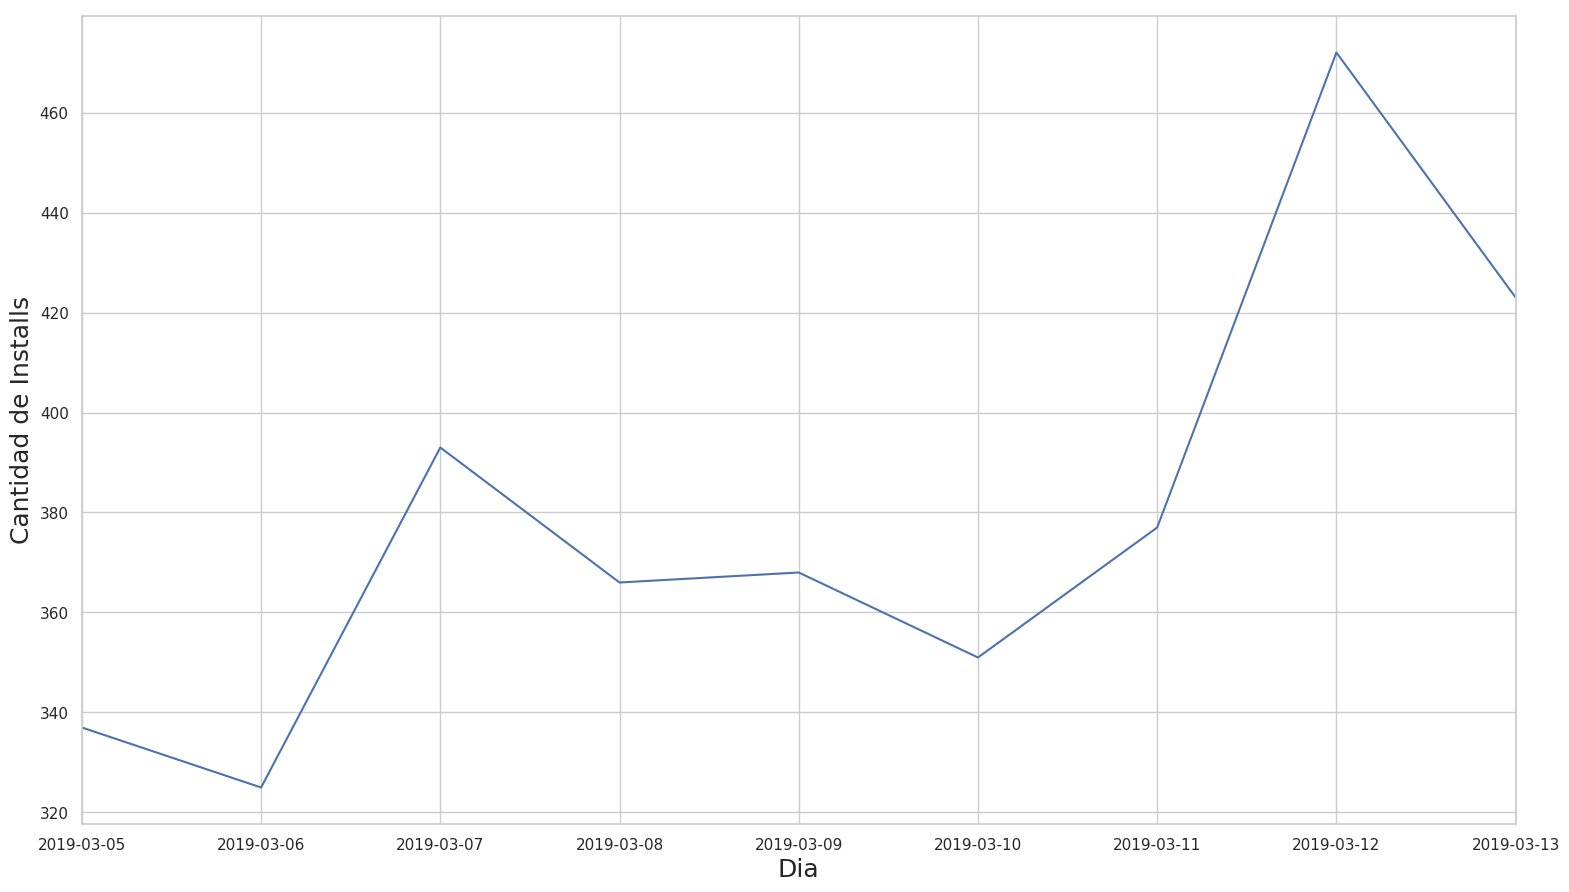

In [44]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
installs_por_dia = installs.groupby('date')['application_id'].count()
g = installs_por_dia.plot()
g.set_xlabel("Dia", fontsize=18)
g.set_ylabel("Cantidad de Installs", fontsize=18)

g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/cant_installs_por_dia.png')

/home/german/.local/lib/python3.5/site-packages/pandas/core/computation/check.py:19: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.6.1

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


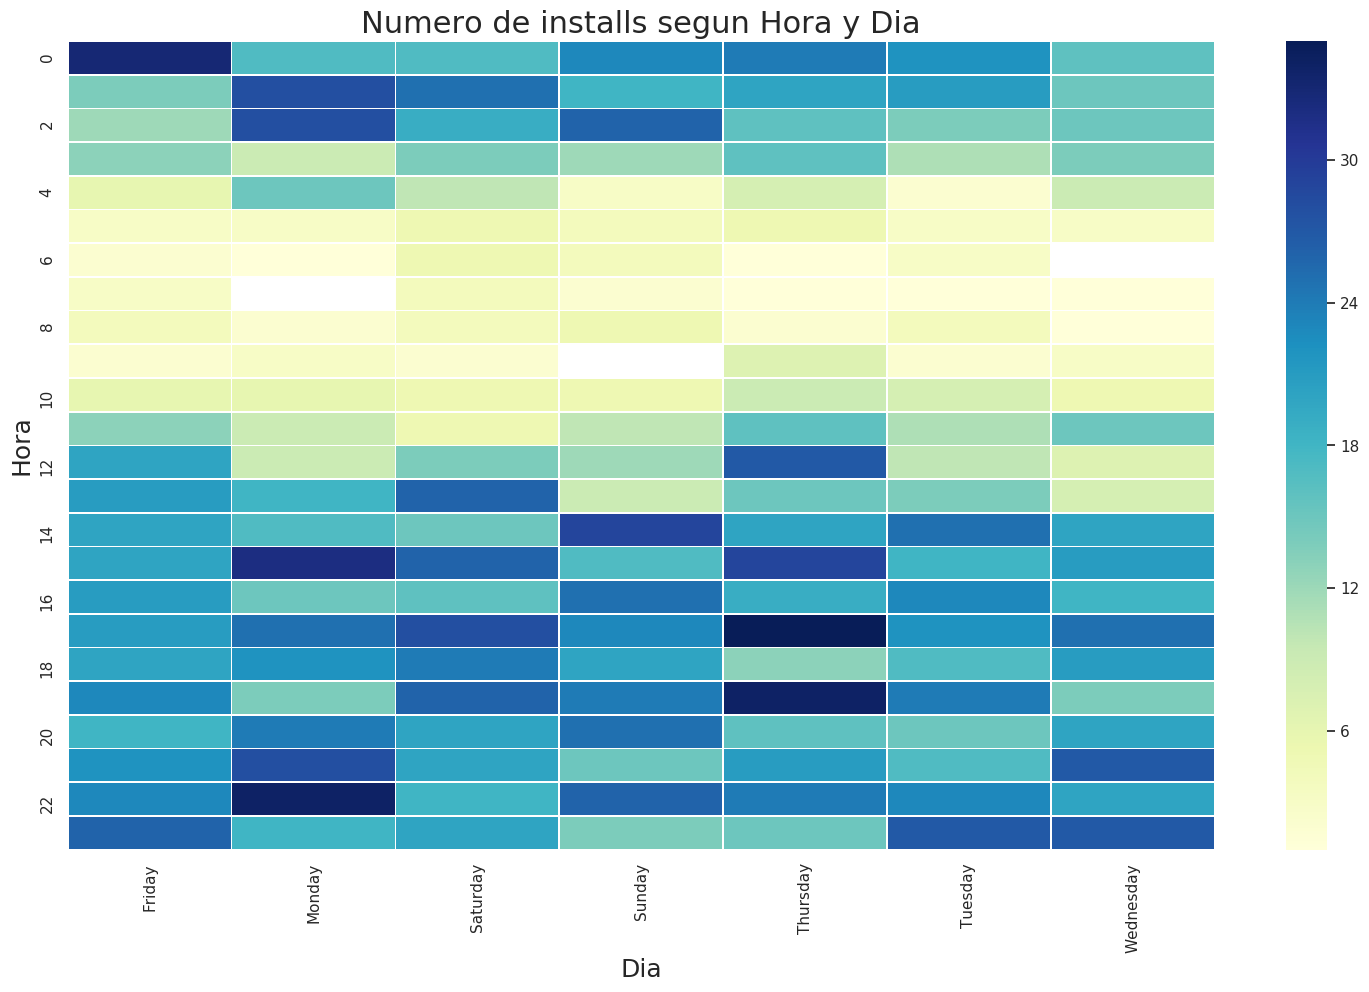

In [38]:
### Numero de installs realizados por dia.
# Filtro los dias 12 y 13 para que justo haya 1 semana de data
tabla_semanal = installs.loc[installs['day'] < 12,:]

for_heatmap_hr_day = tabla_semanal.pivot_table(index='hour', columns='weekday_name', values='counter', aggfunc='sum')

g = sns.heatmap(for_heatmap_hr_day , linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Numero de installs segun Hora y Dia", fontsize=22)
g.set_xlabel("Dia",fontsize=18)
g.set_ylabel("Hora", fontsize=18)


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/installs_hr_dia.png')

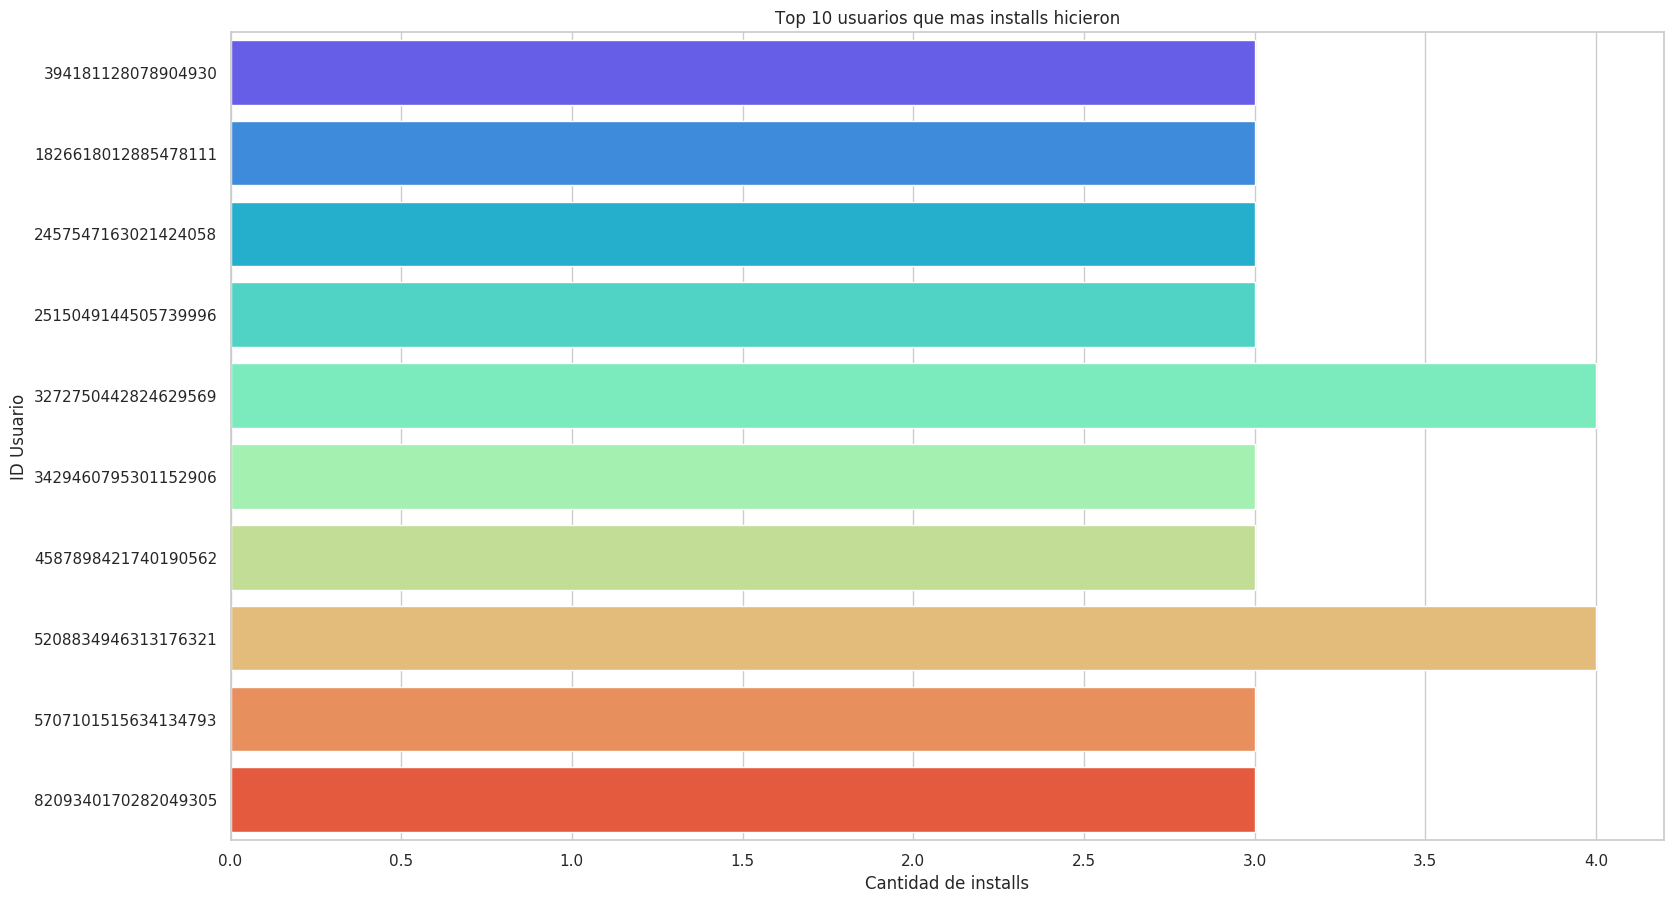

In [39]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('ref_hash')['application_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID Usuario')
g.set_title('Top 10 usuarios que mas installs hicieron')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_10_usuarios_installs.png')

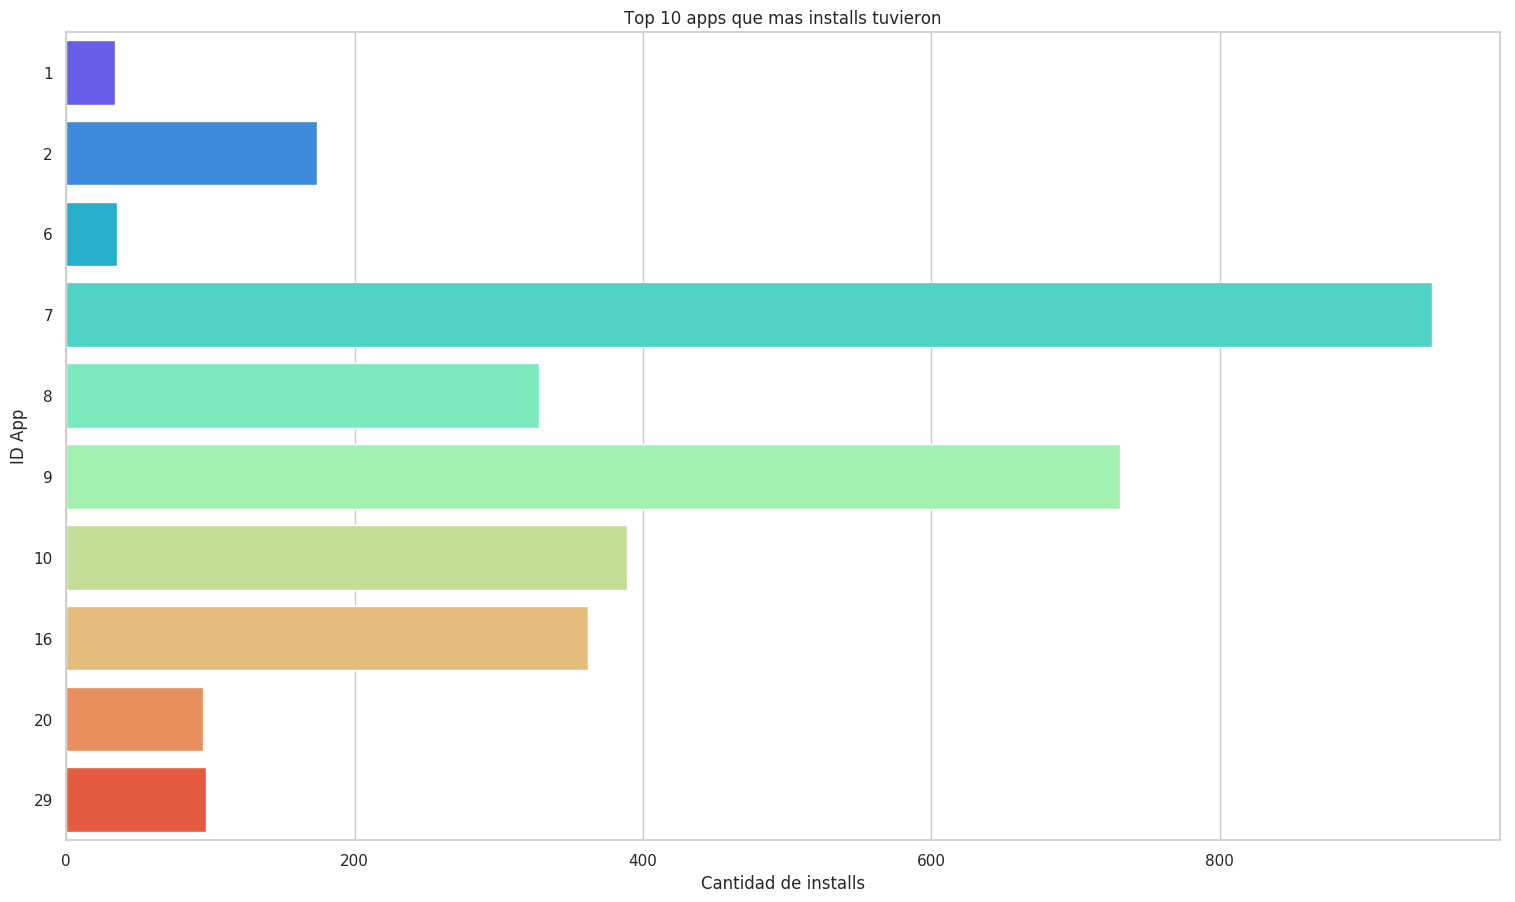

In [45]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('application_id')['application_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID App')
g.set_title('Top 10 apps que mas installs tuvieron')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_10_apps_installs.png')

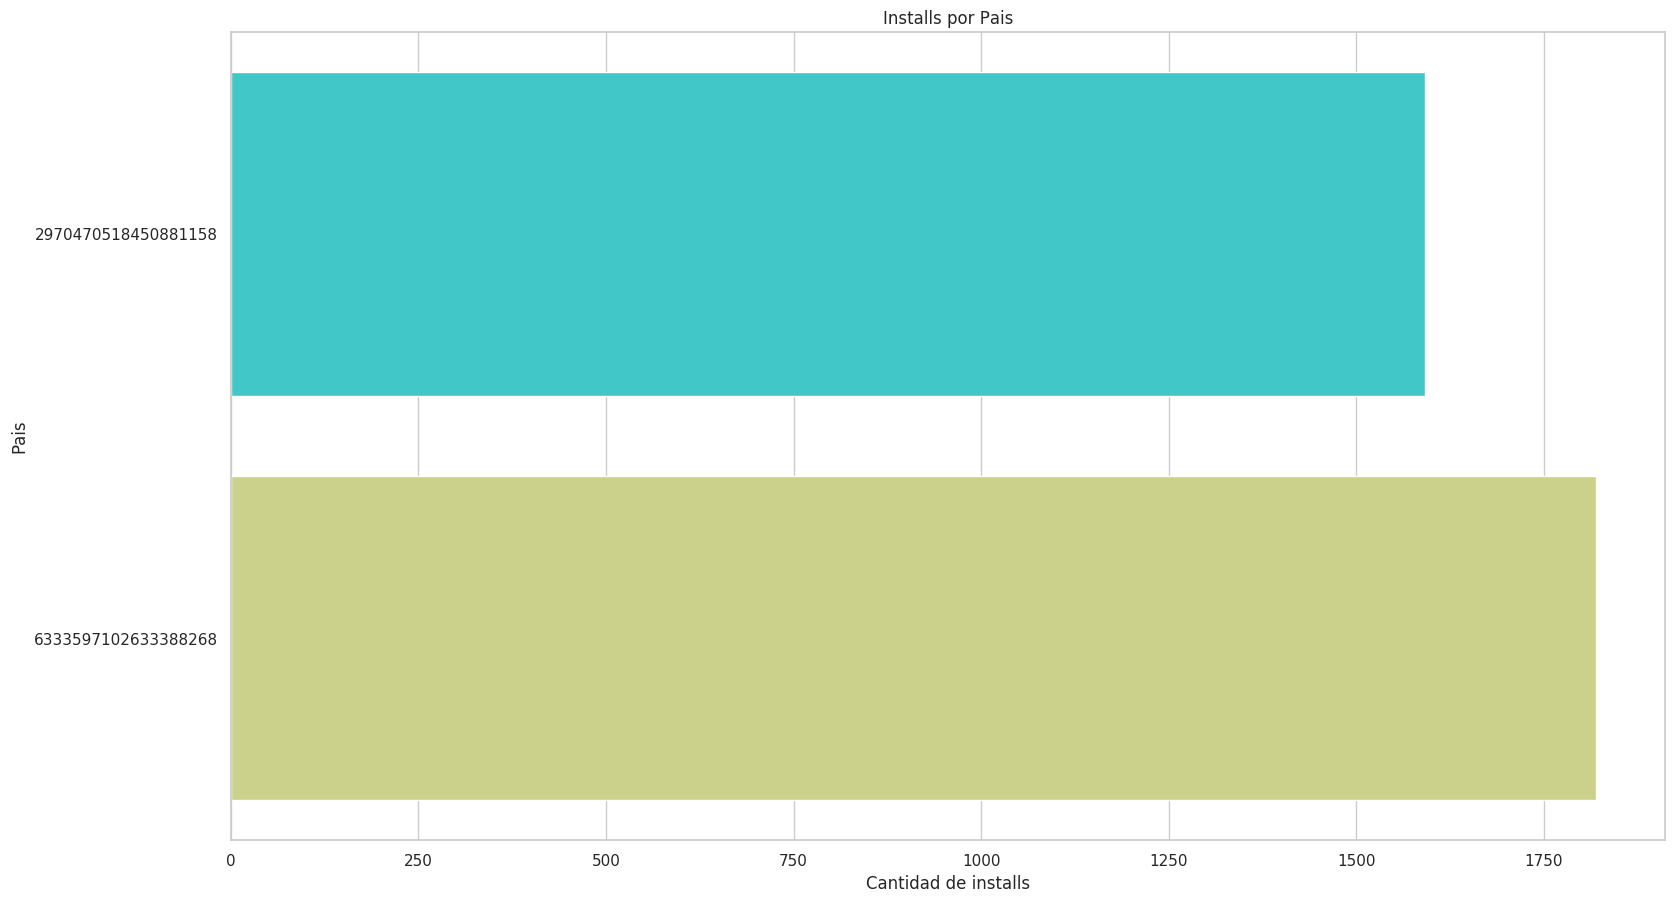

In [41]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('device_countrycode')['application_id'].agg('count').sort_values(ascending=False)[:10]
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('Pais')
g.set_title('Installs por Pais')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/installs_por_pais.png')

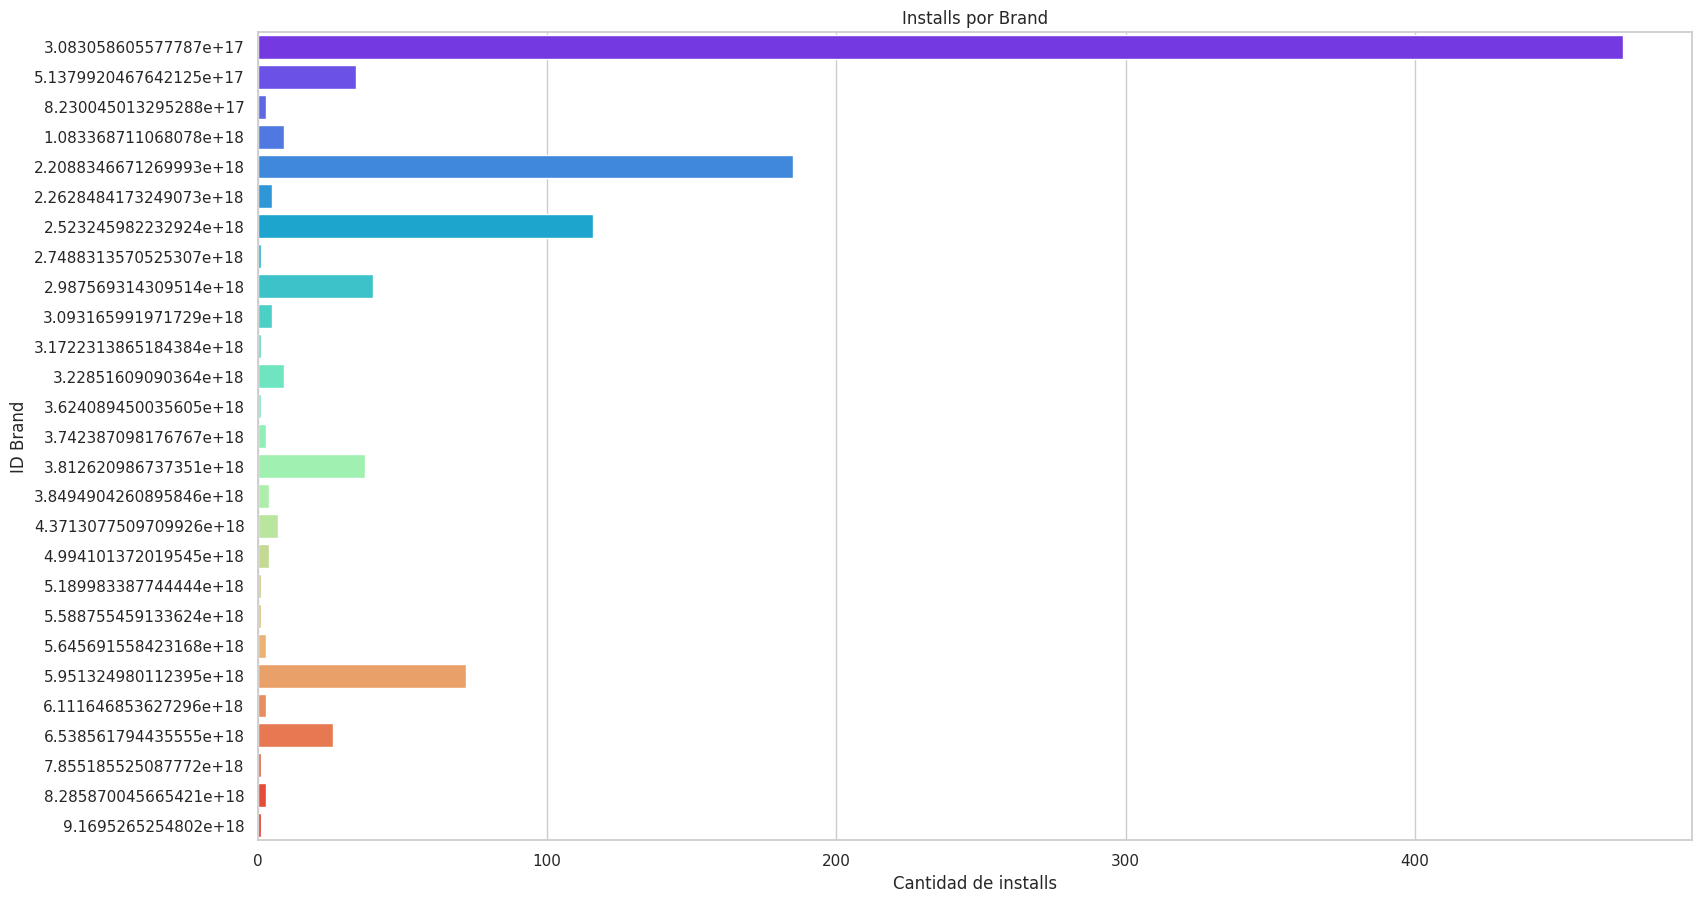

In [51]:
# utilizo la columna 'application_id' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('device_brand')['application_id'].agg('count').sort_values(ascending=False)
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID Brand')
g.set_title('Installs por Brand')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_10_brand_installs.png')

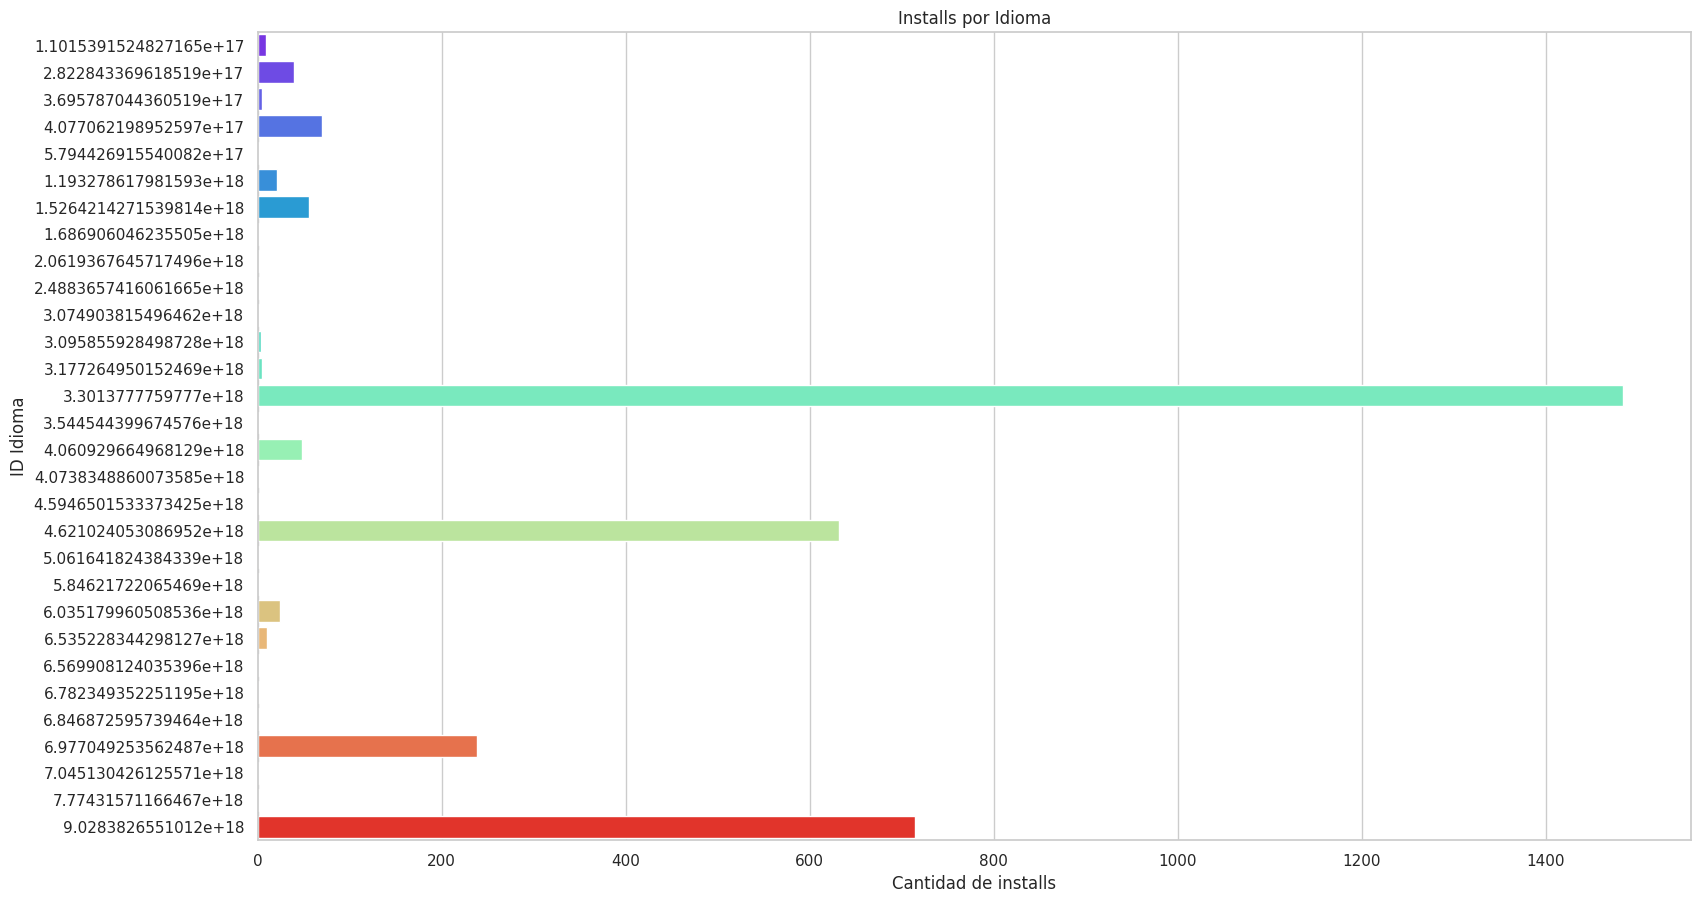

In [52]:
# utilizo la columna 'counter' para contar xq tiene valor no nulo en todos los registros
usuarios = installs.groupby('device_language')['counter'].agg('count').sort_values(ascending=False)
g = sns.barplot(x=usuarios.values, y=usuarios.index, palette='rainbow', orient='h')
g.set_xlabel('Cantidad de installs')
g.set_ylabel('ID Idioma')
g.set_title('Installs por Idioma')


g.get_figure().set_size_inches(18.5, 10.5, forward=True)
g.get_figure().savefig('img/top_10_language_installs.png')

In [56]:
installs.groupby(['device_brand', 'user_agent'])['application_id'].count()

device_brand  user_agent                                                                  
3.083059e+17  Dalvik/1.6.0 (Linux; U; Android 4.1.2; GT-I8262B Build/JZO54K)                   2
              Dalvik/1.6.0 (Linux; U; Android 4.1.2; GT-I8552B Build/JZO54K)                   2
              Dalvik/1.6.0 (Linux; U; Android 4.1.2; GT-N8000 Build/JZO54K)                    1
              Dalvik/1.6.0 (Linux; U; Android 4.2.2; GT-I9063T Build/JDQ39)                    1
              Dalvik/1.6.0 (Linux; U; Android 4.3; SM-G3502T Build/JLS36C)                     2
              Dalvik/1.6.0 (Linux; U; Android 4.3; SM-G7102T Build/JLS36C)                     1
              Dalvik/1.6.0 (Linux; U; Android 4.4.2; GT-P5210 Build/KOT49H)                    1
              Dalvik/1.6.0 (Linux; U; Android 4.4.2; GT-S5312C Build/KOT49H)                   2
              Dalvik/1.6.0 (Linux; U; Android 4.4.2; SM-G110B Build/KOT49H)                    1
              Dalvik/1.6.0 (Linux; U

In [60]:
installs.groupby(['ref_hash', 'device_brand'])['application_id'].count().sort_values()

ref_hash             device_brand
4958526679100225     3.083059e+17    1
5611184548012188441  2.208835e+18    1
5634738659911451938  5.951325e+18    1
5651666841804012468  3.083059e+17    1
5653412983131455761  6.538562e+18    1
5673486627602156791  3.083059e+17    1
5675338478942110054  3.083059e+17    1
5682487104945590494  5.951325e+18    1
5687561920157939968  3.083059e+17    1
5702519445523682055  2.523246e+18    1
5703857289308913755  5.951325e+18    1
5730093385249626197  2.208835e+18    1
5742061314162685631  5.645692e+18    1
5754691161969059178  2.523246e+18    1
5755584711199594053  3.083059e+17    1
5755621990732289986  2.208835e+18    1
5769490111157488831  2.987569e+18    1
5783355789750736502  3.083059e+17    1
5798442016718083629  2.208835e+18    1
5801652291849635098  3.083059e+17    1
5601466796317352138  3.812621e+18    1
5805521595277705698  3.083059e+17    1
5592222636977314940  2.208835e+18    1
5566372061916199893  2.208835e+18    1
5262628146672581353  3.083059e